In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

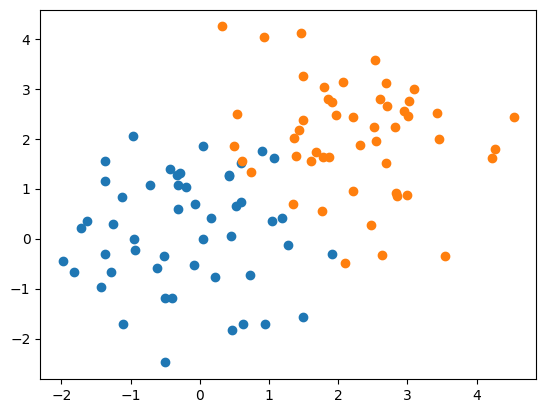

In [32]:
#generate X_1 from a normal distribution
X_1 = np.random.normal(0, 1, size=(50, 2))
X_2 = np.random.normal(2, 1, size=(50, 2))

plt.scatter(X_1[:, 0], X_1[:, 1])
plt.scatter(X_2[:, 0], X_2[:, 1])
plt.show()


$$
NLL(w) = -\frac{1}{N} \sum_{n=1}^N \log p(\mathcal{D}|w)

= \frac{1}{N}\prod_{n=1 \in N} \log Ber(y_n|\mu_n) 
= \prod_{n=1 \in N} \left(\mu_n^{y_n} (1-\mu_n)^{1-y_n} \right) 
= -\frac{1}{N} \sum_{n=1}^N \left[ y_n \log \mu_n + (1-y_n) \log (1-\mu_n ) \right]
= \frac{1}{N} \sum_{n=1}^N H(y_n, \mu_n)

$$

[0.06242738 0.75248663]


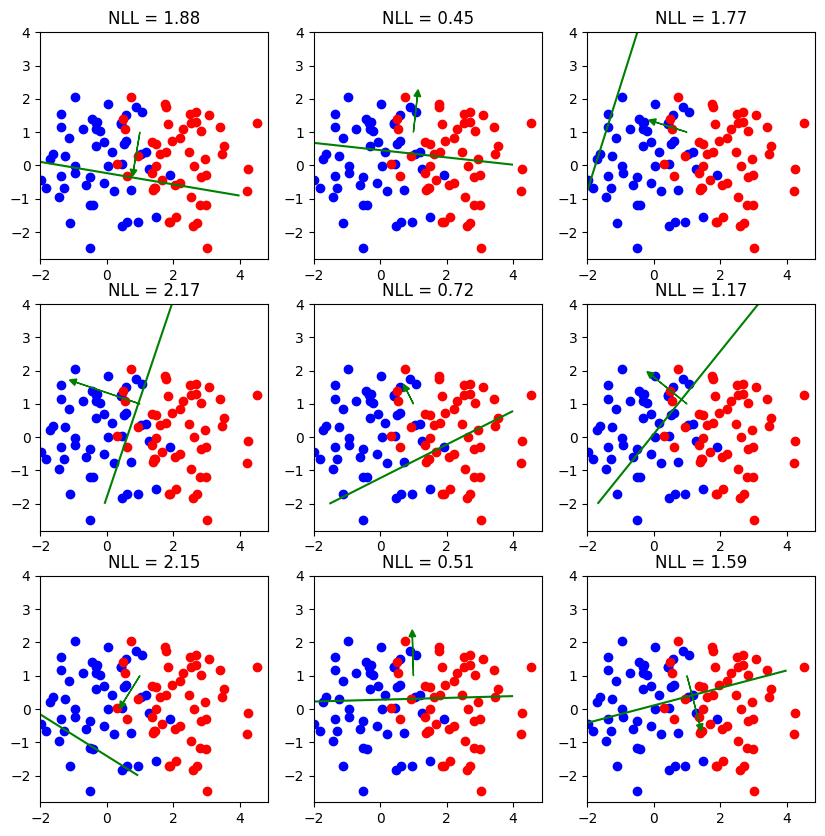

In [75]:
w = np.random.normal(0, 1, 2)
b = 0

print(w)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def pred(w, X, b):
    return sigmoid(X.dot(w) + b)

def NLL(X, y, w, b):
    return -np.mean(y * np.log(pred(w, X, b)) + (1 - y) * np.log(1 - pred(w, X, b)))


def show_decision(w, b, X_1, X_2, ax):
    # plot the points
    ax.scatter(X_1[:, 0], X_1[:, 1], color='blue')  
    ax.scatter(X_2[:, 0], X_1[:, 1], color='red')  

    # plot the decision boundary
    X = np.linspace(-2, 4, 100)
    Y = np.linspace(-2, 4, 100)
    X, Y = np.meshgrid(X, Y)
    
    Z = sigmoid(X * w[0] + Y * w[1] + b)
    
    # Plot the decision boundary
    ax.contour(X, Y, Z, levels=[0.5], colors='green')  # Decision boundary at sigmoid=0.5

    #plot likelihood of the data being generated by this model
    all_X = np.concatenate((X_1, X_2), axis=0)
    all_y = np.concatenate((np.zeros(50), np.ones(50)), axis=0)
    ax.set_title(f"NLL = {NLL(all_X, all_y, w, b):.2f}")

    arrow_origin = [1, 1]  # Midpoint of the plot
    ax.arrow(arrow_origin[0], arrow_origin[1], w[0], w[1], head_width=0.2, head_length=0.2, fc='green', ec='green')
    

weights_and_biases = [(np.random.normal(0, 1, 2), np.random.normal()) for _ in range(9)]

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for ax, (w, b) in zip(axs.flatten(), weights_and_biases):
    show_decision(w, b, X_1, X_2, ax)

plt.show()
#plot a bunch of random w and b lines + their direction, plot using fig.axs 

\begin{align*}
\nabla_{w}NLL(w) &= \sum_{n=1}^N \left[ y_n (1 - \mu_n) x_n - (1 - y_n) \mu_n x_n \right] \\
&= \frac{1}{N} \sum_{n=1}^N \left[ y_n x_n - y_n x_n \ln \mu_n - x_n \mu_n + y_n x_n \mu_n \right] \\
&= \frac{1}{N} \sum_{n=1}^N (\mu_n - y_n) x_n
\end{align*}

Descending...
Step 0/10000, (w,b) = (array([-1.24270637, -0.1320851 ]), 1.2104137937657482), NLL = 1.91
Step 1000/10000, (w,b) = (array([0.89379674, 0.48825456]), -0.6327242125595758), NLL = 0.31
Step 2000/10000, (w,b) = (array([1.27416917, 0.66412103]), -1.4792706883685975), NLL = 0.22
Step 3000/10000, (w,b) = (array([1.50252744, 0.81168358]), -1.9946295908682659), NLL = 0.18
Step 4000/10000, (w,b) = (array([1.67298461, 0.92801533]), -2.3693353020653793), NLL = 0.16
Step 5000/10000, (w,b) = (array([1.81131414, 1.02333065]), -2.6656580290584677), NLL = 0.15
Step 6000/10000, (w,b) = (array([1.9285651 , 1.10417205]), -2.911748025542184), NLL = 0.14
Step 7000/10000, (w,b) = (array([2.03069533, 1.17452738]), -3.1227510908072795), NLL = 0.14
Step 8000/10000, (w,b) = (array([2.12136057, 1.23693905]), -3.307770724470844), NLL = 0.13
Step 9000/10000, (w,b) = (array([2.20299315, 1.29311281]), -3.4727178491196016), NLL = 0.13


No handles with labels found to put in legend.


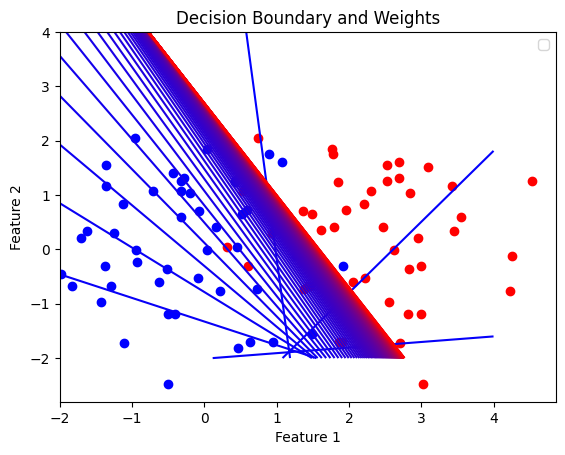

In [84]:

def grad_nll(X, y, w, b):
    return -np.mean((y - pred(w, X, b)) * np.transpose(X), axis=1), -np.mean(y - pred(w, X, b))


def grad_descent(X, y, w, b, lr, n_steps):
    print("Descending...")
    ws = []
    for step in range(n_steps):
        if step % 1000 == 0:
            print(f"Step {step}/{n_steps}, (w,b) = {(w,b)}, NLL = {NLL(X, y, w,b):.2f}")
        grad_w, grad_b = grad_nll(X, y, w, b)
        w -= lr * grad_w
        b -= lr * grad_b
        if step % 100 == 0:
            ws.append((w.copy(), b))
    return w, b, ws

w, b = np.random.normal(0, 1, 2), np.random.normal()
all_X = np.concatenate((X_1, X_2), axis=0)
all_y = np.concatenate((np.zeros(50), np.ones(50)), axis=0)
w, b, ws = grad_descent(all_X, all_y, w, b, 0.01, 10000)

#plot the decision boundary
X = np.linspace(-2, 4, 100)
Y = np.linspace(-2, 4, 100)
X, Y = np.meshgrid(X, Y)

plt.scatter(X_1[:, 0], X_1[:, 1], color='blue')
plt.scatter(X_2[:, 0], X_1[:, 1], color='red')

Z = sigmoid(X * w[0] + Y * w[1] + b)

# Plot the ws in different colors that start from red and become green
for i, (w_i, b_i) in enumerate(ws):
    Z_i = sigmoid(X * w_i[0] + Y * w_i[1] + b_i)
    plt.contour(X, Y, Z_i, levels=[0.5], colors=[(i / len(ws), 0, 1 - i / len(ws))])

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary and Weights')
plt.show()


### 10.2.6 Iteratively reweighted least squares

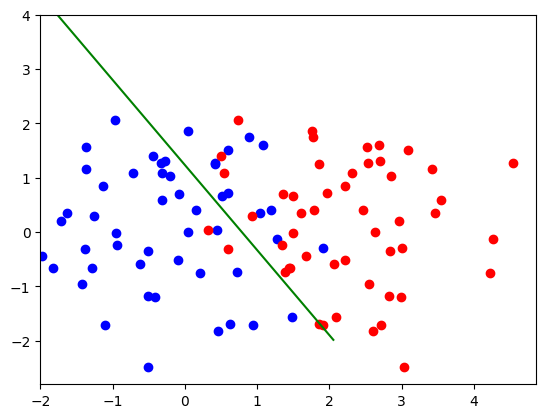

In [103]:


#concatenate 1 as a column for the bias
all_X = np.concatenate((X_1, X_2), axis=0)
all_y = np.concatenate((np.zeros(50), np.ones(50)), axis=0)

all_X = np.concatenate((all_X, np.ones((100, 1))), axis=1)

def irls(X, y, w, n_steps):

    a_vec = all_X.dot(w)

    mu_vec = sigmoid(a_vec)
    sig_vec = mu_vec * (1 - mu_vec)
    y_vec = all_y
    z_vec = a_vec + (y_vec - mu_vec) / (sig_vec + 1e-8)

    S = np.diag(sig_vec)
    H = all_X.T @ S @ all_X # Hessian
    w = np.linalg.inv(H).dot(all_X.T).dot(S).dot(z_vec)

    return w

w = np.random.normal(0, 1, 3)
for _ in range(10):
    try:
        w = irls(all_X, all_y, w, 1000)
    except Exception as e:
        print(e)
        break



#plot the decision boundary

plt.scatter(X_1[:, 0], X_1[:, 1], color='blue')
plt.scatter(X_2[:, 0], X_1[:, 1], color='red')
Z = sigmoid(X * w[0] + Y * w[1] + b)
plt.contour(X, Y, Z, levels=[0.5], colors='green')

